In [1]:
# 26/01/2024

# TF-IDF
# TF: Time Frequency
# IDF: Inverse Document Frequency

# Ejemplo de uso de TF-IDF

Aprenderemos cómo calcular la representación TF-IDF de documents utilizando bibliotecas de Python como Scikit-learn. A continuación, se muestra un ejemplo de cómo se podría hacer esto:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ejemplo de documentos de texto
documents = [
    "Este es un documento de ejemplo.",
    "TF-IDF es una técnica importante en PLN.",
    "El procesamiento del lenguaje natural es fascinante.",
    "La representación vectorial de documents es fundamental."
]

# Crear un vectorizer TF-IDF
vectorizer = TfidfVectorizer()

# Calcular la representación TF-IDF de los documents
tf_idf_matrix = vectorizer.fit_transform(documents)

In [3]:
# La matriz de TF-IDF contiene la representación vectorial de los documentos

# tf_idf_matrix dimension: (4, 24)
# 4: nº de documentos
# 24 nº: 6/documento

tf_idf_matrix

<4x24 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [6]:
print(tf_idf_matrix)

  (0, 4)	0.45203489051046103
  (0, 0)	0.3563894998080638
  (0, 2)	0.45203489051046103
  (0, 21)	0.45203489051046103
  (0, 7)	0.2358905582496689
  (0, 8)	0.45203489051046103
  (1, 16)	0.3708203448243492
  (1, 6)	0.3708203448243492
  (1, 12)	0.3708203448243492
  (1, 20)	0.3708203448243492
  (1, 22)	0.3708203448243492
  (1, 11)	0.3708203448243492
  (1, 19)	0.3708203448243492
  (1, 7)	0.19350943917663396
  (2, 9)	0.3992877139811605
  (2, 15)	0.3992877139811605
  (2, 14)	0.3992877139811605
  (2, 1)	0.3992877139811605
  (2, 17)	0.3992877139811605
  (2, 5)	0.3992877139811605
  (2, 7)	0.20836489335344868
  (3, 10)	0.41190608298099013
  (3, 3)	0.41190608298099013
  (3, 23)	0.41190608298099013
  (3, 18)	0.41190608298099013
  (3, 13)	0.41190608298099013
  (3, 0)	0.3247514870272976
  (3, 7)	0.21494968176261076


# Ejemplo de uso de K-means

En esta sección, aplicaremos el algoritmo K-means para agrupar documents en Python utilizando la representación TF-IDF que aprendimos en la sección anterior. A continuación, se muestra un ejemplo práctico:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Ejemplo de documentos de texto
documents = [
    "Este es un documento de ejemplo.",
    "TF-IDF es una técnica importante en PLN.",
    "El procesamiento del lenguaje natural es fascinante.",
    "La representación vectorial de documents es fundamental."
]

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Calcular la representación TF-IDF de los documents
tf_idf_matrix = vectorizer.fit_transform(documents)

# Aplicar el algoritmo K-means con K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(tf_idf_matrix)

# Obtener las etiquetas de cluster para cada documento
labels = kmeans.labels_

# Mostrar los resultados del clustering
for i, documento in enumerate(documents):
    print(f"Documento: {documento} - Cluster: {labels[i]}")

Documento: Este es un documento de ejemplo. - Cluster: 1
Documento: TF-IDF es una técnica importante en PLN. - Cluster: 0
Documento: El procesamiento del lenguaje natural es fascinante. - Cluster: 1
Documento: La representación vectorial de documents es fundamental. - Cluster: 1


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


En este ejemplo, hemos aplicado K-means para agrupar los documents en dos clusters. Cada documento se asigna a un cluster según su similitud con los centroides calculados por el algoritmo.

# Ejemplo de visualización de agrupación de documentos

Supongamos que hemos aplicado K-means a nuestros documentos en español y hemos obtenido los clusters. A continuación, mostraremos cómo visualizar los resultados utilizando PCA en Python:

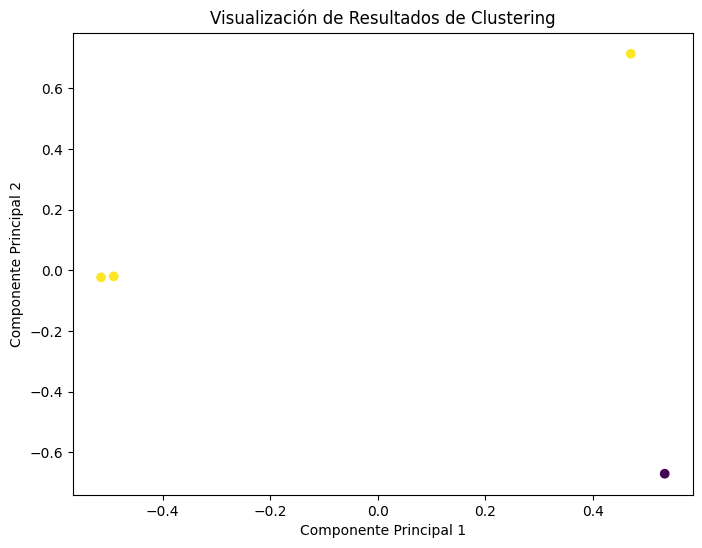

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
resultados_pca = pca.fit_transform(tf_idf_matrix.toarray())

# Graficar los documentos en un plano bidimensional
plt.figure(figsize=(8, 6))
plt.scatter(resultados_pca[:, 0], resultados_pca[:, 1], c=labels, cmap='viridis')
plt.title("Visualización de Resultados de Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

En este ejemplo, hemos aplicado PCA para reducir la dimensionalidad de nuestros datos TF-IDF y los hemos visualizado en un plano bidimensional. Los colores representan los clusters a los que pertenecen los documentos. Esta visualización nos ayuda a identificar patrones y relaciones entre los documentos.

# Ejemplo de uso de TF-IDF con K-means para ocho documentos

En este código, tenemos un ejemplo más extenso con ocho documentos relacionados con el deporte y la tecnología. Utilizamos TF-IDF para representar los documentos como vectores numéricos. A continuación, aplicamos el algoritmo K-means con K=3 para agrupar los documentos en tres clusters. Por último, imprimimos las asignaciones de clusters para cada documento y mostramos los centroides de los clusters.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Ejemplo de documentos de texto relacionados con deportes y tecnología
documents = [
    "El equipo de fútbol ganó el partido en tiempo extra.",
    "Los avances en tecnología móvil continúan sorprendiendo.",
    "El entrenador del equipo de baloncesto anunció cambios en la estrategia.",
    "Nuevas aplicaciones móviles revolucionan la industria tecnológica.",
    "Atletas de todo el mundo compiten en los Juegos Olímpicos.",
    "La inteligencia artificial está remodelando el futuro de la tecnología.",
    "Se está construyendo un nuevo estadio deportivo en la ciudad.",
    "Los científicos están logrando avances en la computación cuántica."
]

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Calcular la representación TF-IDF de los documentos
tfidf_matrix = vectorizer.fit_transform(documents)

# Aplicar el algoritmo K-means con K=2 (2 clusters)
# Con K=2 tampoco es que funcione excesivamente bien
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidf_matrix)

# Obtener las etiquetas de cluster para cada documento
labels = kmeans.labels_

# Mostrar los resultados del clustering
for i, document in enumerate(documents):
    cluster = labels[i]
    print(f"Document: {document} - Cluster: {cluster}")
print()


# Mostrar los centroides de los clusters
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Document: El equipo de fútbol ganó el partido en tiempo extra. - Cluster: 0
Document: Los avances en tecnología móvil continúan sorprendiendo. - Cluster: 1
Document: El entrenador del equipo de baloncesto anunció cambios en la estrategia. - Cluster: 0
Document: Nuevas aplicaciones móviles revolucionan la industria tecnológica. - Cluster: 2
Document: Atletas de todo el mundo compiten en los Juegos Olímpicos. - Cluster: 0
Document: La inteligencia artificial está remodelando el futuro de la tecnología. - Cluster: 2
Document: Se está construyendo un nuevo estadio deportivo en la ciudad. - Cluster: 2
Document: Los científicos están logrando avances en la computación cuántica. - Cluster: 1

Cluster Centroids:
[[0.11732997 0.         0.         0.12109741 0.         0.11732997
  0.11732997 0.         0.         0.12109741 0.         0.
  0.         0.         0.2260856  0.11732997 0.         0.30098905
  0.17817518 0.11732997 0.1973332  0.         0.11732997 0.
  0.         0.11812924 0.    

En este ejemplo, los documentos se han agrupado en tres grupos en función de su contenido. Los centroides de los clusters representan el documento "medio" dentro de cada cluster. Tenga en cuenta que los resultados pueden variar en función de los datos y de la elección de K. En la práctica, deberá ajustar los parámetros y evaluar el rendimiento de la agrupación.

## Visualización de agrupación de documentos

A continuación, mostraremos cómo visualizar los resultados utilizando PCA en Python:

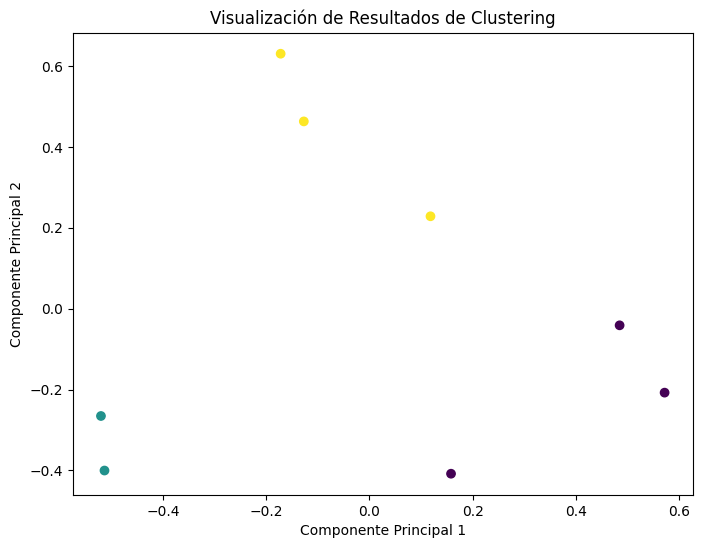

In [17]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
resultados_pca = pca.fit_transform(tfidf_matrix.toarray())

# Graficar los documentos en un plano bidimensional
plt.figure(figsize=(8, 6))
plt.scatter(resultados_pca[:, 0], resultados_pca[:, 1], c=labels, cmap='viridis')
plt.title("Visualización de Resultados de Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()